In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sn

In [ ]:
df = pd.read_csv("/content/ecommerce_customer_data_large.csv")

In [ ]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [ ]:
df.drop(columns=['Customer Age'], inplace=True)

In [ ]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,1.0,John Rivera,31,Female,0


In [ ]:
# Handle missing values
df['Returns'] = df['Returns'].fillna(0)

In [ ]:
# Convert date
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])


In [ ]:
# Create Month and Age Group
df['Month'] = df['Purchase Date'].dt.to_period('M')
df['Age Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 60, 100],
                         labels=['18-25', '26-35', '36-45', '46-60', '60+'])

In [ ]:
# Show cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   Payment Method         250000 non-null  object        
 7   Returns                250000 non-null  float64       
 8   Customer Name          250000 non-null  object        
 9   Age                    250000 non-null  int64         
 10  Gender                 250000 non-null  object        
 11  Churn                  250000 non-null  int64         
 12  Month                  250000 non-null  peri

In [ ]:
df.shape             # Rows & Columns
df.columns           # Column names
df.info()            # Data types
df.describe()        # Summary statistics of numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   Payment Method         250000 non-null  object        
 7   Returns                250000 non-null  float64       
 8   Customer Name          250000 non-null  object        
 9   Age                    250000 non-null  int64         
 10  Gender                 250000 non-null  object        
 11  Churn                  250000 non-null  int64         
 12  Month                  250000 non-null  peri

,Customer ID,Purchase Date,Product Price,Quantity,Total Purchase Amount,Returns,Age,Churn
count,250000.000000,250000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.00000
mean,25017.632092,2021-11-06 19:26:22.286192384,254.742724,3.004936,2725.385196,0.405904,43.798276,0.20052
min,1.000000,2020-01-01 00:07:26,10.000000,1.000000,100.000000,0.000000,18.000000,0.00000
25%,12590.000000,2020-12-03 08:10:12,132.000000,2.000000,1476.000000,0.000000,30.000000,0.00000
50%,25011.000000,2021-11-06 07:39:08.500000,255.000000,3.000000,2725.000000,0.000000,44.000000,0.00000
75%,37441.250000,2022-10-11 01:21:56.249999872,377.000000,4.000000,3975.000000,1.000000,57.000000,0.00000
max,50000.000000,2023-09-13 18:42:49,500.000000,5.000000,5350.000000,1.000000,70.000000,1.00000
std,14412.515718,NaN,141.738104,1.414737,1442.576095,0.491067,15.364915,0.40039


In [ ]:
df['Gender'].value_counts()
df['Payment Method'].value_counts()
df['Product Category'].value_counts()
df['Churn'].value_counts()


,count
Churn,
0,199870
1,50130


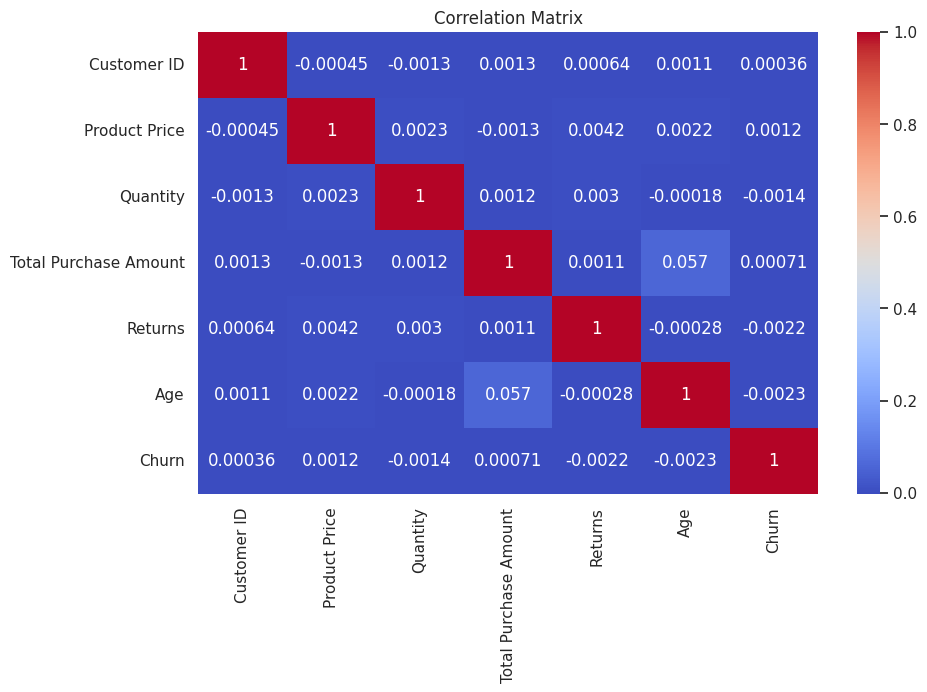

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
df.groupby('Gender')['Total Purchase Amount'].mean()


,Total Purchase Amount
Gender,
Female,2723.202728
Male,2727.544185


In [ ]:
df.groupby('Age Group')['Total Purchase Amount'].mean()


/tmp/ipython-input-268584767.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age Group')['Total Purchase Amount'].mean()


,Total Purchase Amount
Age Group,
18-25,2605.197134
26-35,2664.074852
36-45,2700.942232
46-60,2772.742285
60+,2841.164972


In [ ]:
df.groupby('Product Category')['Returns'].sum()


,Returns
Product Category,
Books,25406.0
Clothing,25302.0
Electronics,25448.0
Home,25320.0


In [ ]:
df.groupby('Product Category')['Churn'].mean()


,Churn
Product Category,
Books,0.200797
Clothing,0.201227
Electronics,0.200431
Home,0.199626


In [ ]:
df.to_csv("cleaned_customer_data.csv", index=False)
